In [1]:
import pandas as pd
import numpy as np

from utils.dataprep import load_emb_gz, make_categories, load_emb

In [47]:
embedding_file = "data/imagenet-27x80-vgg19.test-ctg.emb.gz"

# embedding_file = "data/esp-10000-vgg19.emb.gz"
# embedding_file = "data/imagenet-200x65-vgg19.train.emb.gz"
# results_file = "models/200807-190731-basic.res.csv"
# results_file = "models/200807-190731-basic-noctg.res.csv"
# results_file = "models/200807-190731-basic-esp.res.csv"
# results_file = "models/200807-200959-basic4-noctg.res.csv"
# results_file = "models/200808-135631-switch4-esp.res.csv"


results_file = "models/local_only/000-200822-190027-swi-4-gib-50-47.res.csv"
results_file = "models/200827-104336-noexplore.res.csv"
# New architecture, gibbs sampling
results_file = "models/local_only/000-200824-063024-swi-4-gib-100-40.res.csv"
# New architecture, no exploring
results_file = "models/local_only/000-200824-045043-swi-4-FAL-100-40.res.csv"

### Load categories

In [3]:
_, labels, _ = load_emb_gz(embedding_file)
categories = make_categories(labels)
categories

DONE. 2193 items loaded from data/imagenet-27x80-vgg19.test-ctg.emb.gz.
27 categories found.


array([4, 4, 4, ..., 6, 6, 6], dtype=int64)

In [27]:
np.unique(categories)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)

### Load results

In [48]:
results = pd.read_csv(results_file, index_col=0)
df = results[["target_image", "active_images", "chosen_symbol", "chosen_image_index", "success"]]

In [49]:
results

,sender_name,receiver_name,active_images,target_image,chosen_symbol,chosen_symbol_p,chosen_image,chosen_image_p,chosen_image_index,success
0,01.sender,02.receiver,1781:2106:943:2040,1781,24,0.942808,1781,0.704487,1,1
1,01.sender,02.receiver,1104:1138:1491:24,1104,13,0.498575,1104,0.438280,3,1
2,01.sender,02.receiver,624:1468:856:1719,624,4,0.363022,1468,0.398485,3,0
3,01.sender,02.receiver,1797:1851:234:1286,1797,13,0.286162,1286,0.788098,0,0
4,01.sender,02.receiver,2056:1177:766:1721,2056,13,0.922824,2056,0.734155,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,02.sender,01.receiver,806:1626:706:1153,806,13,0.859735,706,0.391392,1,0
4996,02.sender,01.receiver,2132:2084:1347:1116,2132,4,0.785170,2132,0.607735,1,1
4997,02.sender,01.receiver,1322:1963:1722:320,1322,4,0.608381,1963,0.400466,1,0
4998,02.sender,01.receiver,2105:450:1523:1271,2105,24,0.290687,1271,0.955711,2,0


In [50]:
df.loc[:, "category"] = df.apply(lambda x: categories[x.loc["target_image"]], axis=1)
df.loc[:, "chosen_symbol"] = df.loc[:, "chosen_symbol"].apply(lambda x: int(x.strip("[]")))
df.loc[:, "chosen_image_index"] = df.loc[:, "chosen_image_index"].apply(lambda x: int(x.strip("[]")))

D:\ProgramData\Anaconda3\envs\jupyter-mess\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\ProgramData\Anaconda3\envs\jupyter-mess\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


AttributeError: 'int' object has no attribute 'strip'

In [51]:
df

,target_image,active_images,chosen_symbol,chosen_image_index,success,category
0,1781,1781:2106:943:2040,24,1,1,7
1,1104,1104:1138:1491:24,13,3,1,18
2,624,624:1468:856:1719,4,3,0,14
3,1797,1797:1851:234:1286,13,0,0,0
4,2056,2056:1177:766:1721,13,0,1,26
...,...,...,...,...,...,...
4995,806,806:1626:706:1153,13,1,0,25
4996,2132,2132:2084:1347:1116,4,1,1,6
4997,1322,1322:1963:1722:320,4,1,0,11
4998,2105,2105:450:1523:1271,24,2,0,26


There shouldn't be any correlation between *chosen_symbol* and *image_index*:

In [52]:
pd.pivot_table(df, values="target_image", index=["chosen_symbol"], columns=["chosen_image_index"], aggfunc=np.size)

chosen_image_index,0,1,2,3
chosen_symbol,,,,
4,388.0,410.0,377.0,404.0
9,32.0,30.0,30.0,28.0
13,425.0,420.0,412.0,435.0
14,18.0,18.0,20.0,21.0
19,13.0,7.0,10.0,6.0
22,NaN,1.0,3.0,2.0
24,364.0,395.0,347.0,372.0
32,1.0,NaN,1.0,2.0
33,3.0,1.0,2.0,2.0


In [53]:
pd.pivot_table(df, values="target_image", index=["chosen_symbol"], columns=["success"], aggfunc=np.size)

success,0,1
chosen_symbol,,
4,494.0,1085.0
9,96.0,24.0
13,647.0,1045.0
14,52.0,25.0
19,33.0,3.0
22,6.0,NaN
24,541.0,937.0
32,2.0,2.0
33,8.0,NaN


## tSNE

In [54]:
from sklearn.manifold import TSNE

In [67]:
data = np.zeros([len(categories), (df.loc[:, "chosen_symbol"].max() + 1)])
for k, row in df.iterrows():
    target = row["target_image"]
    other = row["active_images"].split(":")
    for img in other:
        img = int(img)
        if img == target:
            data[img, row["chosen_symbol"]] += 1
        else:
            data[img, row["chosen_symbol"]] -= 0.1
# data = data / data.sum(axis=1)[:, np.newaxis]
notnan = np.where(~np.isnan(data).any(axis=1))
data = data[notnan, :][0]

In [68]:
data.shape

(2193, 34)

In [69]:
tsne = TSNE(n_components=2)
reduced = tsne.fit_transform(data)

In [70]:
import matplotlib.pyplot as plt

## Scatterplot with image categories

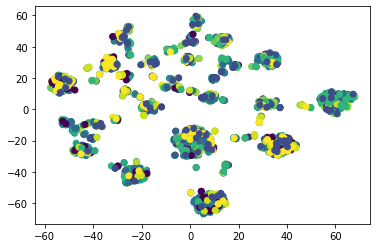

In [71]:
plt.scatter(*reduced.T, c=categories[notnan])

Symbol usage obviously doesn't correlate with imagenet categories. This is in accord with the fact that ignoring the categories in training doesn't affect the training process at all.

## Control plot with used symbols

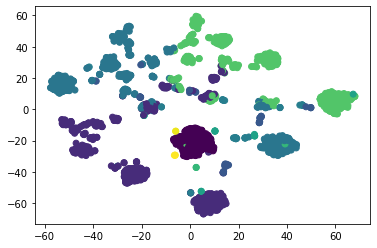

In [72]:
plt.scatter(*reduced.T, c=data.argmax(axis=1))

This is just to make sure that the tSNE works. It does.